ACCESSING ALL 4 FILES


In [60]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

adf = pd.read_csv(r'data/consumer-price-indices_phl.csv')
adf.shape #(799, 16)

#dropping the unneeded columns
adf.drop('Iso3', inplace=True, axis=1)
adf.drop('Area Code', inplace=True, axis=1)
adf.drop('Area Code (M49)', inplace=True, axis=1)
adf.drop('Year Code', inplace=True, axis=1)

#dropping unneeded rows
adf.drop(index=0, axis=0, inplace=True)

#changing string Year to int and dropping some rows
adf['Year'] = pd.to_numeric(adf['Year'])
adf.drop(adf[(adf['Year'] < 2012)].index, inplace=True)
adf.drop(adf[(adf['Year'] > 2020)].index, inplace=True)

#rearranging columns
adf = adf.reindex(columns=['Months', 'Year', 'Item', 'Value', 'StartDate', 'EndDate', 'Item Code', 'Months Code', 'Unit', 'Flag', 'Note'])

adf.info()
#adf

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 13 to 797
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Months       324 non-null    object 
 1   Year         324 non-null    int64  
 2   Item         324 non-null    object 
 3   Value        324 non-null    object 
 4   StartDate    324 non-null    object 
 5   EndDate      324 non-null    object 
 6   Item Code    324 non-null    object 
 7   Months Code  324 non-null    float64
 8   Unit         108 non-null    object 
 9   Flag         324 non-null    object 
 10  Note         216 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 30.4+ KB


determining the unique value groups from the dataframe...and the min/max values


In [61]:
adf['Item'].value_counts() #counts how many unique values/rows each Item have
#adf['Year'].value_counts()

Consumer Prices, Food Indices (2015 = 100)       108
Consumer Prices, General Indices (2015 = 100)    108
Food price inflation                             108
Name: Item, dtype: int64

assigning a dataframe to each 'Item' unique value

In [62]:
adf_1 = adf.loc[adf['Item']=='Consumer Prices, Food Indices (2015 = 100)']
adf_2 = adf.loc[adf['Item']=='Consumer Prices, General Indices (2015 = 100)']
adf_3 = adf.loc[adf['Item']=='Food price inflation']
adf_1.head
#feel free to change the dataframe to display

<bound method NDFrame.head of        Months  Year                                        Item       Value  \
13    January  2012  Consumer Prices, Food Indices (2015 = 100)   89.315532   
14    January  2013  Consumer Prices, Food Indices (2015 = 100)   91.849306   
15    January  2014  Consumer Prices, Food Indices (2015 = 100)   96.011935   
16    January  2015  Consumer Prices, Food Indices (2015 = 100)  100.355547   
17    January  2016  Consumer Prices, Food Indices (2015 = 100)  101.260466   
..        ...   ...                                         ...         ...   
265  December  2016  Consumer Prices, Food Indices (2015 = 100)  103.251289   
266  December  2017  Consumer Prices, Food Indices (2015 = 100)  106.870966   
267  December  2018  Consumer Prices, Food Indices (2015 = 100)  114.019828   
268  December  2019  Consumer Prices, Food Indices (2015 = 100)  116.010650   
269  December  2020  Consumer Prices, Food Indices (2015 = 100)  121.530658   

      StartDate     E

preparing data frames for plotting

In [63]:
#filtering plots based on years
adf_1a = adf_1.loc[adf_1['Year']==2012]
adf_1b = adf_1.loc[adf_1['Year']==2013]
adf_1c = adf_1.loc[adf_1['Year']==2014]
adf_1d = adf_1.loc[adf_1['Year']==2015]
adf_1e = adf_1.loc[adf_1['Year']==2016]
adf_1f = adf_1.loc[adf_1['Year']==2017]
adf_1g = adf_1.loc[adf_1['Year']==2018]
adf_1h = adf_1.loc[adf_1['Year']==2019]
adf_1i = adf_1.loc[adf_1['Year']==2020]

adf_1a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 13 to 261
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Months       12 non-null     object 
 1   Year         12 non-null     int64  
 2   Item         12 non-null     object 
 3   Value        12 non-null     object 
 4   StartDate    12 non-null     object 
 5   EndDate      12 non-null     object 
 6   Item Code    12 non-null     object 
 7   Months Code  12 non-null     float64
 8   Unit         0 non-null      object 
 9   Flag         12 non-null     object 
 10  Note         12 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.1+ KB


actual plotting for "Consumer Prices, Food Indices - per year"

<Figure size 800x600 with 0 Axes>

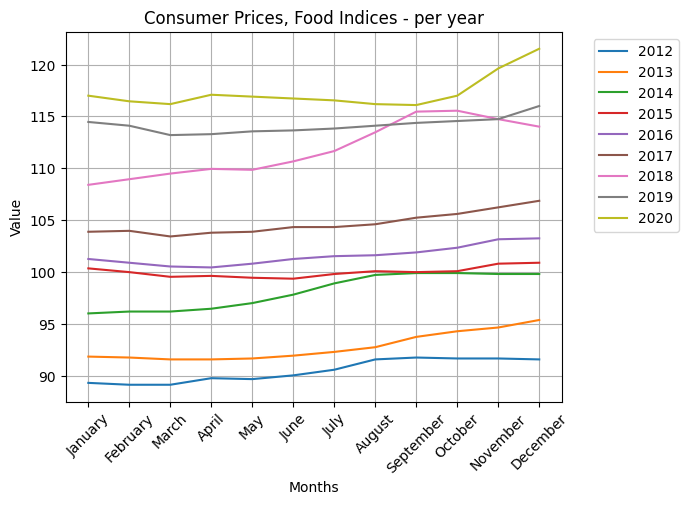

In [64]:
plt_1 = plt.figure(figsize=(8, 6))

#giving name to the plot and labels to axis
fig, ax = plt.subplots()
plt.title("Consumer Prices, Food Indices - per year")
plt.xlabel("Months")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.plot(adf_1a.Months, np.asarray(adf_1a.Value, float), label='2012')
ax.plot(adf_1a.Months, np.asarray(adf_1b.Value, float), label='2013')
ax.plot(adf_1a.Months, np.asarray(adf_1c.Value, float), label='2014')
ax.plot(adf_1a.Months, np.asarray(adf_1d.Value, float), label='2015')
ax.plot(adf_1a.Months, np.asarray(adf_1e.Value, float), label='2016')
ax.plot(adf_1a.Months, np.asarray(adf_1f.Value, float), label='2017')
ax.plot(adf_1a.Months, np.asarray(adf_1g.Value, float), label='2018')
ax.plot(adf_1a.Months, np.asarray(adf_1h.Value, float), label='2019')
ax.plot(adf_1a.Months, np.asarray(adf_1i.Value, float), label='2020')

#show legend to show labels, and position outside the plot
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

prepping for SECOND plot

In [65]:
adf_2a = adf_2.loc[adf_2['Year']==2012]
adf_2b = adf_2.loc[adf_2['Year']==2013]
adf_2c = adf_2.loc[adf_2['Year']==2014]
adf_2d = adf_2.loc[adf_2['Year']==2015]
adf_2e = adf_2.loc[adf_2['Year']==2016]
adf_2f = adf_2.loc[adf_2['Year']==2017]
adf_2g = adf_2.loc[adf_2['Year']==2018]
adf_2h = adf_2.loc[adf_2['Year']==2019]
adf_2i = adf_2.loc[adf_2['Year']==2020]

plotting for SECOND batch

<Figure size 800x600 with 0 Axes>

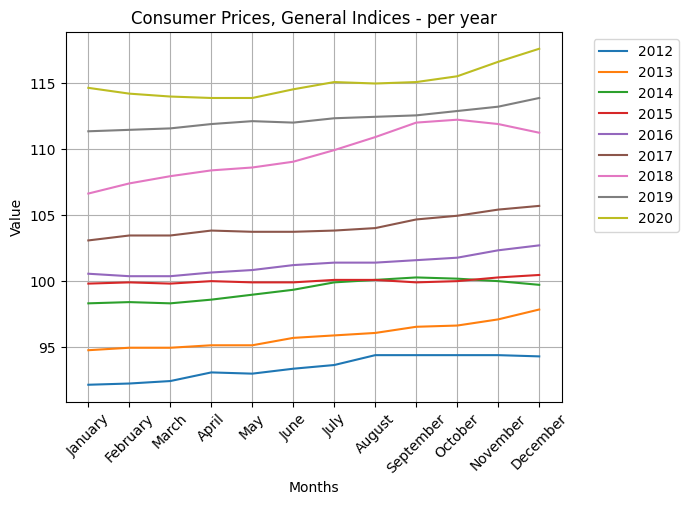

In [66]:
plt_2 = plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
plt.title("Consumer Prices, General Indices - per year")
plt.xlabel("Months")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.plot(adf_2a.Months, np.asarray(adf_2a.Value, float), label='2012')
ax.plot(adf_2a.Months, np.asarray(adf_2b.Value, float), label='2013')
ax.plot(adf_2a.Months, np.asarray(adf_2c.Value, float), label='2014')
ax.plot(adf_2a.Months, np.asarray(adf_2d.Value, float), label='2015')
ax.plot(adf_2a.Months, np.asarray(adf_2e.Value, float), label='2016')
ax.plot(adf_2a.Months, np.asarray(adf_2f.Value, float), label='2017')
ax.plot(adf_2a.Months, np.asarray(adf_2g.Value, float), label='2018')
ax.plot(adf_2a.Months, np.asarray(adf_2h.Value, float), label='2019')
ax.plot(adf_2a.Months, np.asarray(adf_2i.Value, float), label='2020')

#show legend to show labels, and position outside the plot
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

prepping for THIRD plot ------adf_3 = 'Food price inflation'------

In [67]:
adf_3a = adf_3.loc[adf_3['Year']==2012]
adf_3b = adf_3.loc[adf_3['Year']==2013]
adf_3c = adf_3.loc[adf_3['Year']==2014]
adf_3d = adf_3.loc[adf_3['Year']==2015]
adf_3e = adf_3.loc[adf_3['Year']==2016]
adf_3f = adf_3.loc[adf_3['Year']==2017]
adf_3g = adf_3.loc[adf_3['Year']==2018]
adf_3h = adf_3.loc[adf_3['Year']==2019]
adf_3i = adf_3.loc[adf_3['Year']==2020]

plotting for THIRD BATCH of file A

<Figure size 800x600 with 0 Axes>

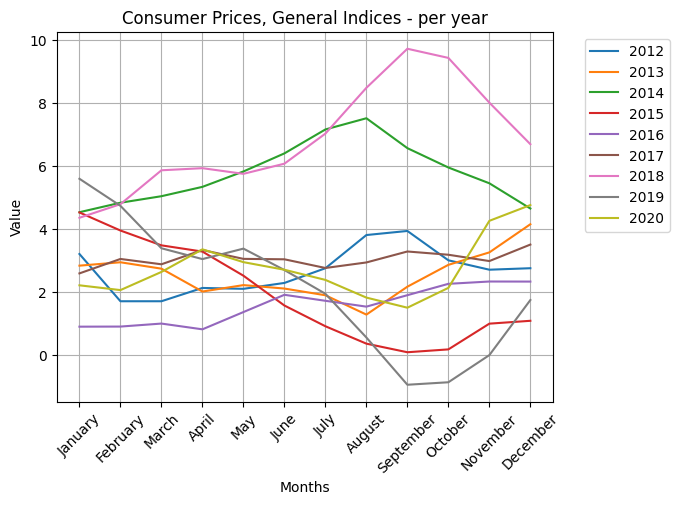

In [69]:
plt_3 = plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
plt.title("Consumer Prices, General Indices - per year")
plt.xlabel("Months")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.plot(adf_3a.Months, np.asarray(adf_3a.Value, float), label='2012')
ax.plot(adf_3a.Months, np.asarray(adf_3b.Value, float), label='2013')
ax.plot(adf_3a.Months, np.asarray(adf_3c.Value, float), label='2014')
ax.plot(adf_3a.Months, np.asarray(adf_3d.Value, float), label='2015')
ax.plot(adf_3a.Months, np.asarray(adf_3e.Value, float), label='2016')
ax.plot(adf_3a.Months, np.asarray(adf_3f.Value, float), label='2017')
ax.plot(adf_3a.Months, np.asarray(adf_3g.Value, float), label='2018')
ax.plot(adf_3a.Months, np.asarray(adf_3h.Value, float), label='2019')
ax.plot(adf_3a.Months, np.asarray(adf_3i.Value, float), label='2020')

#show legend to show labels, and position outside the plot
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

accessing 2/4 files as 'bdf' - deflation.....provides the following selection of implicit price deflator series by country and at regional level: Gross Domestic Product (GDP) deflator, Gross Fixed Capital Formation (GFCF) deflator, Agriculture, Forestry, Fishery Value-Added (VA_AFF) deflator, and Manufacturing Valued-Added (VA_MAN) deflator.

In [70]:
bdf = pd.read_csv(r'data/deflators_phl.csv')
bdf.shape #(409, 15)
#bdf.info()
bdf.head

#dropping the unneeded columns
bdf.drop('Iso3', inplace=True, axis=1)
bdf.drop('Area Code', inplace=True, axis=1)
bdf.drop('Area Code (M49)', inplace=True, axis=1)
bdf.drop('Year Code', inplace=True, axis=1)
bdf.drop('Item Code', inplace=True, axis=1)
bdf.drop('Element Code', inplace=True, axis=1)

#dropping unneeded rows
bdf.drop(index=0, axis=0, inplace=True)

#changing string Year to int and dropping some rows
bdf['Year'] = pd.to_numeric(bdf['Year'])
bdf.drop(bdf[(bdf['Year'] < 2012)].index, inplace=True)
bdf.drop(bdf[(bdf['Year'] > 2020)].index, inplace=True)
bdf

,StartDate,EndDate,Area,Item,Element,Year,Unit,Value,Flag
43,2012-01-01,2012-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2012,LCU,95.767000,E
44,2013-01-01,2013-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2013,LCU,97.740800,E
45,2014-01-01,2014-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2014,LCU,100.724900,E
46,2015-01-01,2015-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2015,LCU,100.000000,E
47,2016-01-01,2016-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2016,LCU,101.280300,E
...,...,...,...,...,...,...,...,...,...
404,2016-01-01,2016-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2016,US$,95.667500,E
405,2017-01-01,2017-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2017,US$,90.872300,E
406,2018-01-01,2018-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2018,US$,89.375600,E
407,2019-01-01,2019-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2019,US$,90.707700,E


determining unique values in dataset

In [71]:
bdf['Item'].value_counts() #counts how many unique values/rows each Item have
#bdf['Element'].value_counts()

GDP Deflator                                                18
Gross Fixed Capital Formation Deflator                      18
Value Added Deflator (Agriculture, forestry and fishery)    18
Value Added Deflator (Manufacturing)                        18
Name: Item, dtype: int64

assigning a dataframe to each 'Item' unique value

In [72]:
#each has 2 sub-categories: local prices, and export prices
bdf_1 = bdf.loc[bdf['Item']=='GDP Deflator']
bdf_2 = bdf.loc[bdf['Item']=='Gross Fixed Capital Formation Deflator']
bdf_3 = bdf.loc[bdf['Item']=='Value Added Deflator (Agriculture, forestry and fishery)']
bdf_4 = bdf.loc[bdf['Item']=='Value Added Deflator (Manufacturing)']
bdf_1 
#adf_2
#feel free to change the dataframe to display

,StartDate,EndDate,Area,Item,Element,Year,Unit,Value,Flag
43,2012-01-01,2012-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2012,LCU,95.767000,E
44,2013-01-01,2013-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2013,LCU,97.740800,E
45,2014-01-01,2014-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2014,LCU,100.724900,E
46,2015-01-01,2015-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2015,LCU,100.000000,E
47,2016-01-01,2016-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2016,LCU,101.280300,E
48,2017-01-01,2017-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2017,LCU,103.630300,E
49,2018-01-01,2018-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2018,LCU,107.506700,E
50,2019-01-01,2019-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2019,LCU,108.256100,E
51,2020-01-01,2020-12-31,Philippines,GDP Deflator,"Value Local Currency, 2015 prices",2020,LCU,110.029800,E
94,2012-01-01,2012-12-31,Philippines,GDP Deflator,"Value US$, 2015 prices",2012,US$,103.191900,E


PREPPING for FIRST BATCH of file B

In [73]:
#filtering plots based on the 'Element'
bdf_1a = bdf_1.loc[bdf_1['Element']=='Value Local Currency, 2015 prices']
bdf_1b = bdf_1.loc[bdf_1['Element']=='Value US$, 2015 prices']
bdf_1b

,StartDate,EndDate,Area,Item,Element,Year,Unit,Value,Flag
94,2012-01-01,2012-12-31,Philippines,GDP Deflator,"Value US$, 2015 prices",2012,US$,103.191900,E
95,2013-01-01,2013-12-31,Philippines,GDP Deflator,"Value US$, 2015 prices",2013,US$,104.779400,E
96,2014-01-01,2014-12-31,Philippines,GDP Deflator,"Value US$, 2015 prices",2014,US$,103.238000,E
97,2015-01-01,2015-12-31,Philippines,GDP Deflator,"Value US$, 2015 prices",2015,US$,100.000000,E
98,2016-01-01,2016-12-31,Philippines,GDP Deflator,"Value US$, 2015 prices",2016,US$,97.037300,E
99,2017-01-01,2017-12-31,Philippines,GDP Deflator,"Value US$, 2015 prices",2017,US$,93.554000,E
100,2018-01-01,2018-12-31,Philippines,GDP Deflator,"Value US$, 2015 prices",2018,US$,92.892700,E
101,2019-01-01,2019-12-31,Philippines,GDP Deflator,"Value US$, 2015 prices",2019,US$,95.103500,E
102,2020-01-01,2020-12-31,Philippines,GDP Deflator,"Value US$, 2015 prices",2020,US$,100.891900,E


PLOTTING for FIRST BATCH of file B

<Figure size 800x600 with 0 Axes>

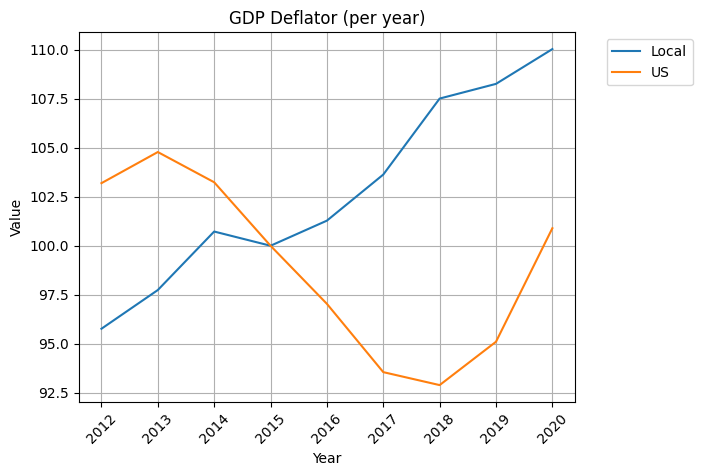

In [74]:
#bdf_1 = bdf.loc[bdf['Item']=='GDP Deflator']

plt_4 = plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
plt.title("GDP Deflator (per year)")
plt.xlabel("Year")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

#plot to compare local and international prices
ax.plot(bdf_1a.Year, np.asarray(bdf_1a.Value, float), label='Local')
ax.plot(bdf_1a.Year, np.asarray(bdf_1b.Value, float), label='US')

#show legend to show labels, and position outside the plot
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

PREPPING for SECOND BATCH of file B

In [76]:
#bdf_2 = bdf.loc[bdf['Item']=='Gross Fixed Capital Formation Deflator']

#filtering plots based on the 'Element'
bdf_2a = bdf_2.loc[bdf_2['Element']=='Value Local Currency, 2015 prices']
bdf_2b = bdf_2.loc[bdf_2['Element']=='Value US$, 2015 prices']
bdf_2b

,StartDate,EndDate,Area,Item,Element,Year,Unit,Value,Flag
196,2012-01-01,2012-12-31,Philippines,Gross Fixed Capital Formation Deflator,"Value US$, 2015 prices",2012,US$,105.301000,E
197,2013-01-01,2013-12-31,Philippines,Gross Fixed Capital Formation Deflator,"Value US$, 2015 prices",2013,US$,106.413100,E
198,2014-01-01,2014-12-31,Philippines,Gross Fixed Capital Formation Deflator,"Value US$, 2015 prices",2014,US$,103.647100,E
199,2015-01-01,2015-12-31,Philippines,Gross Fixed Capital Formation Deflator,"Value US$, 2015 prices",2015,US$,100.000000,E
200,2016-01-01,2016-12-31,Philippines,Gross Fixed Capital Formation Deflator,"Value US$, 2015 prices",2016,US$,96.709300,E
201,2017-01-01,2017-12-31,Philippines,Gross Fixed Capital Formation Deflator,"Value US$, 2015 prices",2017,US$,92.512600,E
202,2018-01-01,2018-12-31,Philippines,Gross Fixed Capital Formation Deflator,"Value US$, 2015 prices",2018,US$,92.015800,E
203,2019-01-01,2019-12-31,Philippines,Gross Fixed Capital Formation Deflator,"Value US$, 2015 prices",2019,US$,95.806200,E
204,2020-01-01,2020-12-31,Philippines,Gross Fixed Capital Formation Deflator,"Value US$, 2015 prices",2020,US$,99.277200,E


PLOTTING for SECOND BATCH of file B

<Figure size 800x600 with 0 Axes>

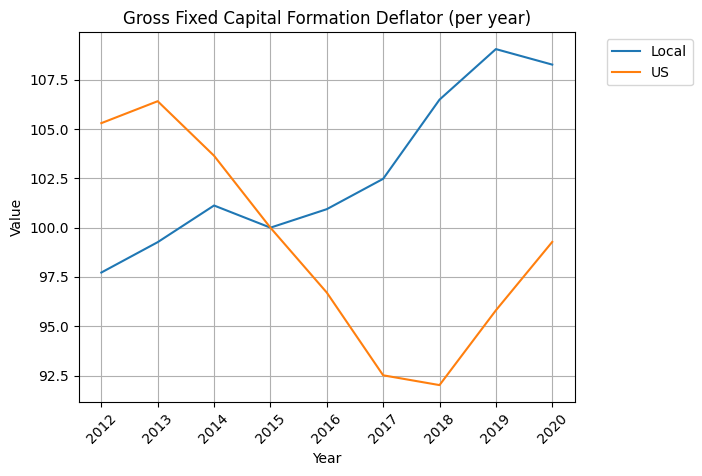

In [78]:
#bdf_2 = bdf.loc[bdf['Item']=='Gross Fixed Capital Formation Deflator']

plt_4 = plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
plt.title("Gross Fixed Capital Formation Deflator (per year)")
plt.xlabel("Year")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

#plot to compare local and international prices
ax.plot(bdf_2a.Year, np.asarray(bdf_2a.Value, float), label='Local')
ax.plot(bdf_2a.Year, np.asarray(bdf_2b.Value, float), label='US')

#show legend to show labels, and position outside the plot
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

PREPPING for THIRD BATCH of file B

In [80]:
#bdf_3 = bdf.loc[bdf['Item']=='Value Added Deflator (Agriculture, forestry and fishery)']

#filtering plots based on the 'Element'
bdf_3a = bdf_3.loc[bdf_3['Element']=='Value Local Currency, 2015 prices']
bdf_3b = bdf_3.loc[bdf_3['Element']=='Value US$, 2015 prices']
bdf_3b

,StartDate,EndDate,Area,Item,Element,Year,Unit,Value,Flag
298,2012-01-01,2012-12-31,Philippines,"Value Added Deflator (Agriculture, forestry an...","Value US$, 2015 prices",2012,US$,107.520900,E
299,2013-01-01,2013-12-31,Philippines,"Value Added Deflator (Agriculture, forestry an...","Value US$, 2015 prices",2013,US$,107.842900,E
300,2014-01-01,2014-12-31,Philippines,"Value Added Deflator (Agriculture, forestry an...","Value US$, 2015 prices",2014,US$,109.130000,E
301,2015-01-01,2015-12-31,Philippines,"Value Added Deflator (Agriculture, forestry an...","Value US$, 2015 prices",2015,US$,100.000000,E
302,2016-01-01,2016-12-31,Philippines,"Value Added Deflator (Agriculture, forestry an...","Value US$, 2015 prices",2016,US$,97.430600,E
303,2017-01-01,2017-12-31,Philippines,"Value Added Deflator (Agriculture, forestry an...","Value US$, 2015 prices",2017,US$,96.140300,E
304,2018-01-01,2018-12-31,Philippines,"Value Added Deflator (Agriculture, forestry an...","Value US$, 2015 prices",2018,US$,95.139300,E
305,2019-01-01,2019-12-31,Philippines,"Value Added Deflator (Agriculture, forestry an...","Value US$, 2015 prices",2019,US$,93.350200,E
306,2020-01-01,2020-12-31,Philippines,"Value Added Deflator (Agriculture, forestry an...","Value US$, 2015 prices",2020,US$,103.597200,E


PLOTTING for THIRD BATCH of file B

<Figure size 800x600 with 0 Axes>

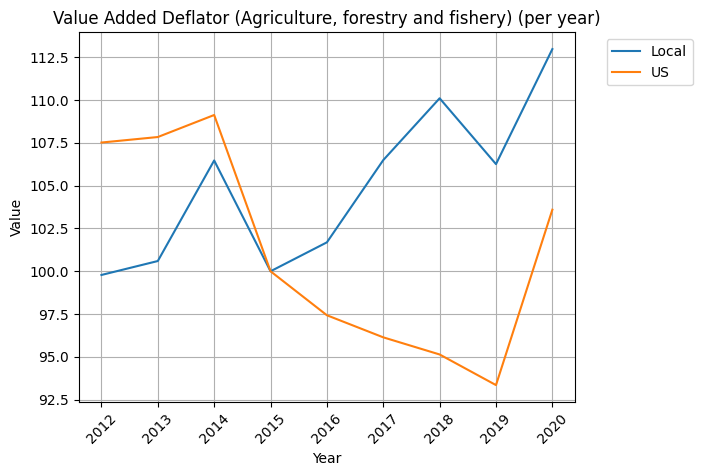

In [81]:
#bdf_3 = bdf.loc[bdf['Item']=='Value Added Deflator (Agriculture, forestry and fishery)']

plt_4 = plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
plt.title("Value Added Deflator (Agriculture, forestry and fishery) (per year)")
plt.xlabel("Year")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

#plot to compare local and international prices
ax.plot(bdf_3a.Year, np.asarray(bdf_3a.Value, float), label='Local')
ax.plot(bdf_3a.Year, np.asarray(bdf_3b.Value, float), label='US')

#show legend to show labels, and position outside the plot
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

PREPPING for FOURTH BATCH of file B

In [82]:
#bdf_4 = bdf.loc[bdf['Item']=='Value Added Deflator (Manufacturing)']

#filtering plots based on the 'Element'
bdf_4a = bdf_4.loc[bdf_4['Element']=='Value Local Currency, 2015 prices']
bdf_4b = bdf_4.loc[bdf_4['Element']=='Value US$, 2015 prices']
bdf_4b

,StartDate,EndDate,Area,Item,Element,Year,Unit,Value,Flag
400,2012-01-01,2012-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2012,US$,108.308500,E
401,2013-01-01,2013-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2013,US$,107.553300,E
402,2014-01-01,2014-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2014,US$,105.414200,E
403,2015-01-01,2015-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2015,US$,100.000000,E
404,2016-01-01,2016-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2016,US$,95.667500,E
405,2017-01-01,2017-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2017,US$,90.872300,E
406,2018-01-01,2018-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2018,US$,89.375600,E
407,2019-01-01,2019-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2019,US$,90.707700,E
408,2020-01-01,2020-12-31,Philippines,Value Added Deflator (Manufacturing),"Value US$, 2015 prices",2020,US$,92.043300,E


PLOTTING for FOURTH BATCH of file B

<Figure size 800x600 with 0 Axes>

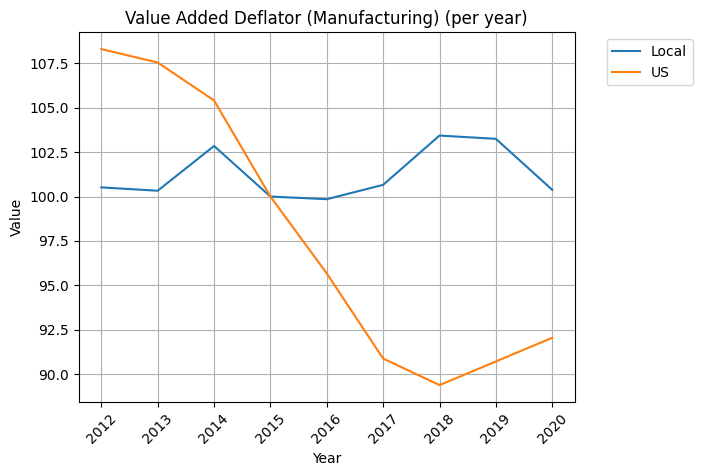

In [83]:
#bdf_4 = bdf.loc[bdf['Item']=='Value Added Deflator (Manufacturing)']

plt_4 = plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
plt.title("Value Added Deflator (Manufacturing) (per year)")
plt.xlabel("Year")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

#plot to compare local and international prices
ax.plot(bdf_4a.Year, np.asarray(bdf_4a.Value, float), label='Local')
ax.plot(bdf_4a.Year, np.asarray(bdf_4b.Value, float), label='US')

#show legend to show labels, and position outside the plot
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ACCESSING THIRD DATASET FILE

In [86]:
cdf = pd.read_csv(r'data/exchange-rates_phl.csv')
cdf.shape #(799, 16)

#dropping the unneeded columns
cdf.drop('Iso3', inplace=True, axis=1)
cdf.drop('Area Code', inplace=True, axis=1)
cdf.drop('Area Code (M49)', inplace=True, axis=1)
cdf.drop('Year Code', inplace=True, axis=1)
cdf.drop('Unit', inplace=True, axis=1)
#cdf.info()

#dropping unneeded rows
cdf.drop(index=0, axis=0, inplace=True)

#changing string Year to int and dropping some rows
cdf['Year'] = pd.to_numeric(cdf['Year'])
cdf.drop(cdf[(cdf['Year'] < 2012)].index, inplace=True)
cdf.drop(cdf[(cdf['Year'] > 2020)].index, inplace=True)
#ddf.info()

#separate the dataframe for Annual Values
#cdf = cdf.loc[cdf['Element']=='Standard local currency units per USD']
#cdf
#rearranging columns
#cdf = cdf.reindex(columns=['Months', 'Year', 'Item', 'Value', 'StartDate', 'EndDate', 'Item Code', 'Months Code', 'Unit', 'Flag', 'Note'])

DETERMINING the UNIQUE values of a column

In [87]:
#cdf = pd.read_csv(r'data/exchange-rates_phl.csv')

#element has 2 categories: Local currency units per USD AND Standard local currency units per USD
cdf['Element'].value_counts()

Local currency units per USD             117
Standard local currency units per USD      9
Name: Element, dtype: int64

FILTERING

In [88]:
#cdf = pd.read_csv(r'data/exchange-rates_phl.csv')

#filtering plots based on the 'Element', plot by year
cdf_1 = cdf.loc[cdf['Element']=='Local currency units per USD']
cdf_2 = cdf.loc[cdf['Element']=='Standard local currency units per USD']
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 547 to 727
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StartDate          126 non-null    object 
 1   EndDate            126 non-null    object 
 2   Area               126 non-null    object 
 3   Element Code       126 non-null    object 
 4   Element            126 non-null    object 
 5   ISO Currency Code  126 non-null    object 
 6   Currency           126 non-null    object 
 7   Year               126 non-null    int64  
 8   Months Code        126 non-null    float64
 9   Months             126 non-null    object 
 10  Value              126 non-null    object 
 11  Flag               126 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 12.8+ KB


PREPPING for FIRST BATCH of file D

In [89]:
#cdf = pd.read_csv(r'data/exchange-rates_phl.csv')

#filtering plots based on the 'Element', plot by year
cdf_1a = cdf_1.loc[cdf_1['Year']==2012]
cdf_1b = cdf_1.loc[cdf_1['Year']==2013]
cdf_1c = cdf_1.loc[cdf_1['Year']==2014]
cdf_1d = cdf_1.loc[cdf_1['Year']==2015]
cdf_1e = cdf_1.loc[cdf_1['Year']==2016]
cdf_1f = cdf_1.loc[cdf_1['Year']==2017]
cdf_1g = cdf_1.loc[cdf_1['Year']==2018]
cdf_1h = cdf_1.loc[cdf_1['Year']==2019]
cdf_1i = cdf_1.loc[cdf_1['Year']==2020]

cdf_1a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 547 to 559
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StartDate          13 non-null     object 
 1   EndDate            13 non-null     object 
 2   Area               13 non-null     object 
 3   Element Code       13 non-null     object 
 4   Element            13 non-null     object 
 5   ISO Currency Code  13 non-null     object 
 6   Currency           13 non-null     object 
 7   Year               13 non-null     int64  
 8   Months Code        13 non-null     float64
 9   Months             13 non-null     object 
 10  Value              13 non-null     object 
 11  Flag               13 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.3+ KB


PLOTTING FIRST BATCH for file D

<Figure size 800x600 with 0 Axes>

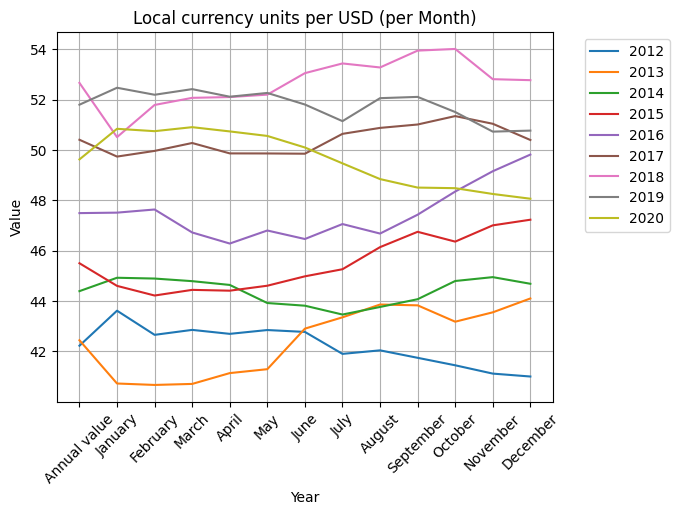

In [90]:
#ddf = pd.read_csv(r'data/exchange-rates_phl.csv')

plt_5 = plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
plt.title("Local currency units per USD (per Month)")
plt.xlabel("Year")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

#plot to compare local and international prices
ax.plot(cdf_1a.Months, np.asarray(cdf_1a.Value, float), label='2012')
ax.plot(cdf_1a.Months, np.asarray(cdf_1b.Value, float), label='2013')
ax.plot(cdf_1a.Months, np.asarray(cdf_1c.Value, float), label='2014')
ax.plot(cdf_1a.Months, np.asarray(cdf_1d.Value, float), label='2015')
ax.plot(cdf_1a.Months, np.asarray(cdf_1e.Value, float), label='2016')
ax.plot(cdf_1a.Months, np.asarray(cdf_1f.Value, float), label='2017')
ax.plot(cdf_1a.Months, np.asarray(cdf_1g.Value, float), label='2018')
ax.plot(cdf_1a.Months, np.asarray(cdf_1h.Value, float), label='2019')
ax.plot(cdf_1a.Months, np.asarray(cdf_1i.Value, float), label='2020')
#show legend to show labels, and position outside the plot
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

PREPPING for SECOND BATCH of FILE D (no need, since the values are annual)

PLOTTING for SECOND BATCH of FILE D

<Figure size 800x600 with 0 Axes>

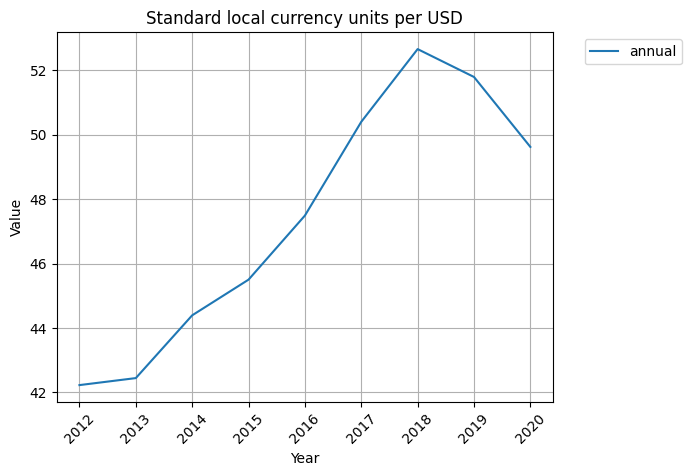

In [92]:
#cdf = pd.read_csv(r'data/exchange-rates_phl.csv')

plt_6 = plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
plt.title("Standard local currency units per USD")
plt.xlabel("Year")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

#plot to compare local and international prices
ax.plot(cdf_2.Year, np.asarray(cdf_2.Value, float), label="annual")

#show legend to show labels, and position outside the plot
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ACCESSING FOURTH DATASET FILE

In [146]:
ddf = pd.read_csv(r'data/producer-prices_phl.csv')
ddf.shape #(799, 16)

#dropping the unneeded columns
ddf.drop('Iso3', inplace=True, axis=1)
ddf.drop('Area Code', inplace=True, axis=1)
ddf.drop('Area Code (M49)', inplace=True, axis=1)
ddf.drop('Year Code', inplace=True, axis=1)

#dropping unneeded rows
ddf.drop(index=0, axis=0, inplace=True)

#changing string Year to int and dropping some rows
ddf['Year'] = pd.to_numeric(ddf['Year'])
ddf.drop(ddf[(ddf['Year'] < 2012)].index, inplace=True)
ddf.drop(ddf[(ddf['Year'] > 2020)].index, inplace=True)
#ddf.info()

ddf_1 = ddf.loc[ddf['Element']=="Producer Price (LCU/tonne)"]
ddf_2 = ddf.loc[ddf['Element']=="Producer Price Index (2014-2016 = 100)"]
ddf_3 = ddf.loc[ddf['Element']=="Producer Price (SLC/tonne)"]
ddf_4 = ddf.loc[ddf['Element']=="Producer Price (USD/tonne)"]
ddf_2.shape
#ddf.info()
#ddf
#rearranging columns
#cdf = cdf.reindex(columns=['Months', 'Year', 'Item', 'Value', 'StartDate', 'EndDate', 'Item Code', 'Months Code', 'Unit', 'Flag', 'Note'])

(1050, 14)

DETERMINING UNIQUE VALUES

In [135]:
ddf['Element'].value_counts()
#ddf['Item'].value_counts() #117 unique values
#ddf_1['Year'].value_counts() #60 unique
#ddf_2['Item'].nunique() #117
#ddf_3['Item'].nunique() #60
#ddf_4['Item'].nunique() #60
ddf['Item'].unique()

array(['Abaca, manila hemp, raw', 'Agave fibres, raw, n.e.c.',
       'Asparagus', 'Avocados', 'Bananas', 'Beans, dry', 'Cabbages',
       'Cantaloupes and other melons', 'Carrots and turnips',
       'Cashew nuts, in shell', 'Cassava, fresh', 'Castor oil seeds',
       'Cauliflowers and broccoli',
       'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Cocoa beans', 'Coconuts, in shell', 'Coffee, green',
       'Cotton lint, ginned', 'Cotton seed', 'Cow peas, dry',
       'Cucumbers and gherkins',
       'Edible roots and tubers with high starch or inulin content, n.e.c., fresh',
       'Eggplants (aubergines)',
       'Eggs from other birds in shell, fresh, n.e.c.', 'Ginger, raw',
       'Grapes', 'Green corn (maize)', 'Green garlic',
       'Groundnuts, excluding shelled', 'Hen eggs in shell, fresh',
       'Horse meat, fresh or chilled',
       'Horse meat, fresh or chilled (biological)',


FILTERING DATASET BY YEAR

In [162]:
ddf_meat = ddf_1.loc[ddf_1['Item'].str.contains('meat|Meat')]

ddf_meat_1 = ddf_meat.loc[ddf_meat['Year']==2015]
ddf_meat_2 = ddf_meat.loc[ddf_meat['Year']==2019]
ddf_meat_3 = ddf_meat.loc[ddf_meat['Year']==2020]

#2015
ddf_meat_1a = ddf_meat_1.loc[ddf_meat_1['Item'].str.contains('buffalo')]
ddf_meat_1b = ddf_meat_1.loc[ddf_meat_1['Item'].str.contains('cattle')]
ddf_meat_1c = ddf_meat_1.loc[ddf_meat_1['Item'].str.contains('ducks')]
ddf_meat_1d = ddf_meat_1.loc[ddf_meat_1['Item'].str.contains('goat')]
ddf_meat_1e = ddf_meat_1.loc[ddf_meat_1['Item'].str.contains('pig')]
#2019 - covid year
ddf_meat_2a = ddf_meat_2.loc[ddf_meat_2['Item'].str.contains('buffalo')]
ddf_meat_2b = ddf_meat_2.loc[ddf_meat_2['Item'].str.contains('cattle')]
ddf_meat_2c = ddf_meat_2.loc[ddf_meat_2['Item'].str.contains('ducks')]
ddf_meat_2d = ddf_meat_2.loc[ddf_meat_2['Item'].str.contains('goat')]
ddf_meat_2e = ddf_meat_2.loc[ddf_meat_2['Item'].str.contains('pig')]
#2020
ddf_meat_3a = ddf_meat_3.loc[ddf_meat_3['Item'].str.contains('buffalo')]
ddf_meat_3b = ddf_meat_3.loc[ddf_meat_3['Item'].str.contains('cattle')]
ddf_meat_3c = ddf_meat_3.loc[ddf_meat_3['Item'].str.contains('ducks')]
ddf_meat_3d = ddf_meat_3.loc[ddf_meat_3['Item'].str.contains('goat')]
ddf_meat_3e = ddf_meat_3.loc[ddf_meat_3['Item'].str.contains('pig')]

ddf_meat_1['Item'].unique()

array(['Meat of buffalo, fresh or chilled (biological)',
       'Meat of cattle with the bone, fresh or chilled (biological)',
       'Meat of chickens, fresh or chilled (biological)',
       'Meat of ducks, fresh or chilled (biological)',
       'Meat of goat, fresh or chilled (biological)',
       'Meat of pig with the bone, fresh or chilled (biological)'],
      dtype=object)

PLOTTING PER YEAR - only the MEAT PRODUCTS plotted

<Figure size 800x600 with 0 Axes>

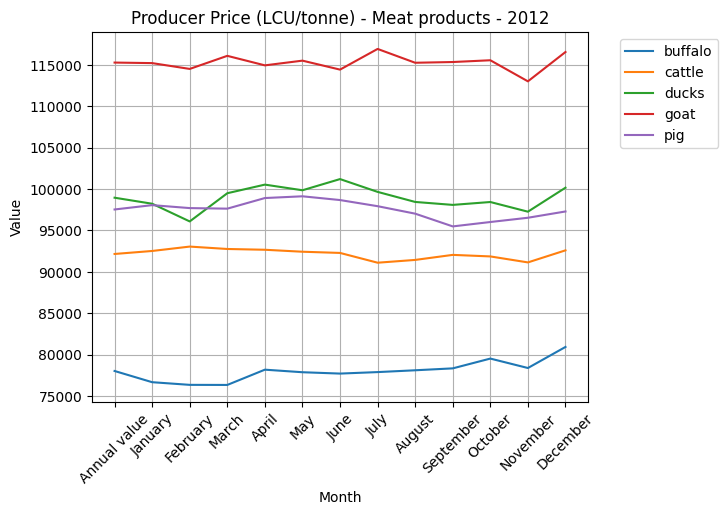

In [160]:
plt_7 = plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
plt.title("Producer Price (LCU/tonne) - Meat products - 2015")
plt.xlabel("Month")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

#plot to compare local and international prices
ax.plot(ddf_meat_1a.Months, np.asarray(ddf_meat_1a.Value, float), label="buffalo")
ax.plot(ddf_meat_1a.Months, np.asarray(ddf_meat_1b.Value, float), label="cattle")
ax.plot(ddf_meat_1a.Months, np.asarray(ddf_meat_1c.Value, float), label="ducks")
ax.plot(ddf_meat_1a.Months, np.asarray(ddf_meat_1d.Value, float), label="goat")
ax.plot(ddf_meat_1a.Months, np.asarray(ddf_meat_1e.Value, float), label="pig")

#show legend to show labels, and position outside the plot
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

<Figure size 800x600 with 0 Axes>

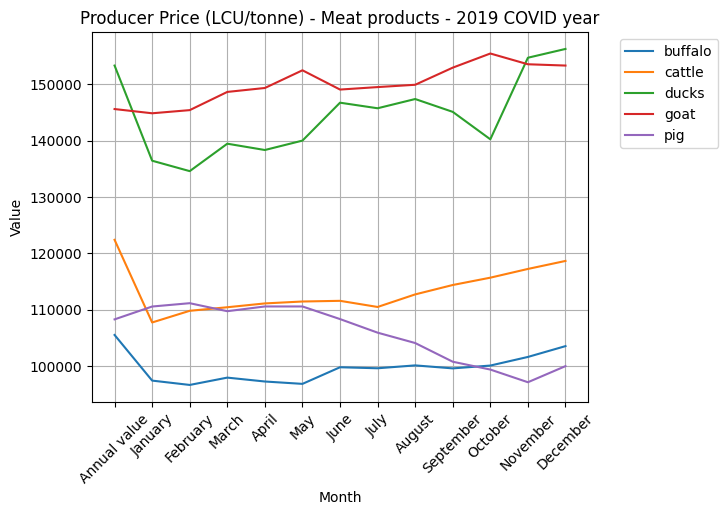

In [163]:
plt_7 = plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
plt.title("Producer Price (LCU/tonne) - Meat products - 2019 COVID year")
plt.xlabel("Month")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

#plot to compare local and international prices
ax.plot(ddf_meat_2a.Months, np.asarray(ddf_meat_2a.Value, float), label="buffalo")
ax.plot(ddf_meat_2a.Months, np.asarray(ddf_meat_2b.Value, float), label="cattle")
ax.plot(ddf_meat_2a.Months, np.asarray(ddf_meat_2c.Value, float), label="ducks")
ax.plot(ddf_meat_2a.Months, np.asarray(ddf_meat_2d.Value, float), label="goat")
ax.plot(ddf_meat_2a.Months, np.asarray(ddf_meat_2e.Value, float), label="pig")

#show legend to show labels, and position outside the plot
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

<Figure size 800x600 with 0 Axes>

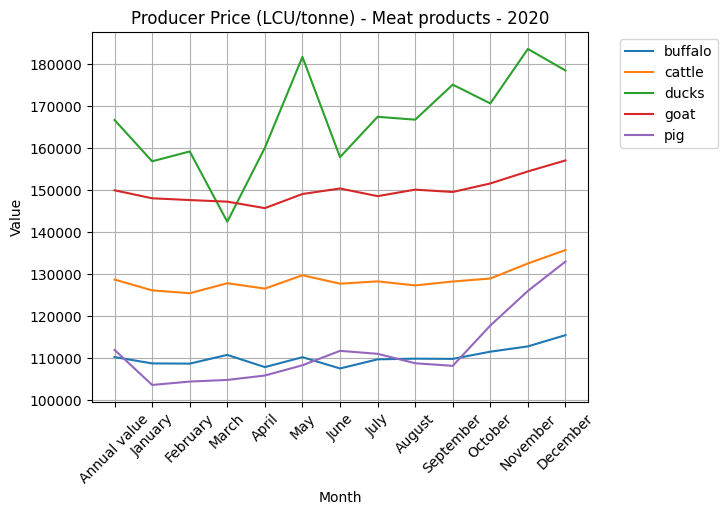

In [165]:
plt_7 = plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
plt.title("Producer Price (LCU/tonne) - Meat products - 2020")
plt.xlabel("Month")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

#plot to compare local and international prices
ax.plot(ddf_meat_3a.Months, np.asarray(ddf_meat_3a.Value, float), label="buffalo")
ax.plot(ddf_meat_3a.Months, np.asarray(ddf_meat_3b.Value, float), label="cattle")
ax.plot(ddf_meat_3a.Months, np.asarray(ddf_meat_3c.Value, float), label="ducks")
ax.plot(ddf_meat_3a.Months, np.asarray(ddf_meat_3d.Value, float), label="goat")
ax.plot(ddf_meat_3a.Months, np.asarray(ddf_meat_3e.Value, float), label="pig")

#show legend to show labels, and position outside the plot
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')